In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error

In [71]:
data=pd.read_csv("/content/drive/MyDrive/Oasis/Advertising.csv")

In [72]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [73]:
data.shape

(200, 5)

In [74]:
data.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [75]:
#dropping the unnamed column
data=data.drop('Unnamed: 0', axis=1)

In [76]:
data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [77]:
data.tail(10)

,TV,Radio,Newspaper,Sales
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,9.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [78]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [80]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [81]:
# Filter rows based on a condition (e.g., sales greater than 20)
filtered_data = data[data['Sales'] > 20]
print('Filtered Data:')
print(filtered_data.head())

Filtered Data:
       TV  Radio  Newspaper  Sales
0   230.1   37.8       69.2   22.1
15  195.4   47.7       52.9   22.4
17  281.4   39.6       55.8   24.4
30  292.9   28.3       43.2   21.4
36  266.9   43.8        5.0   25.4


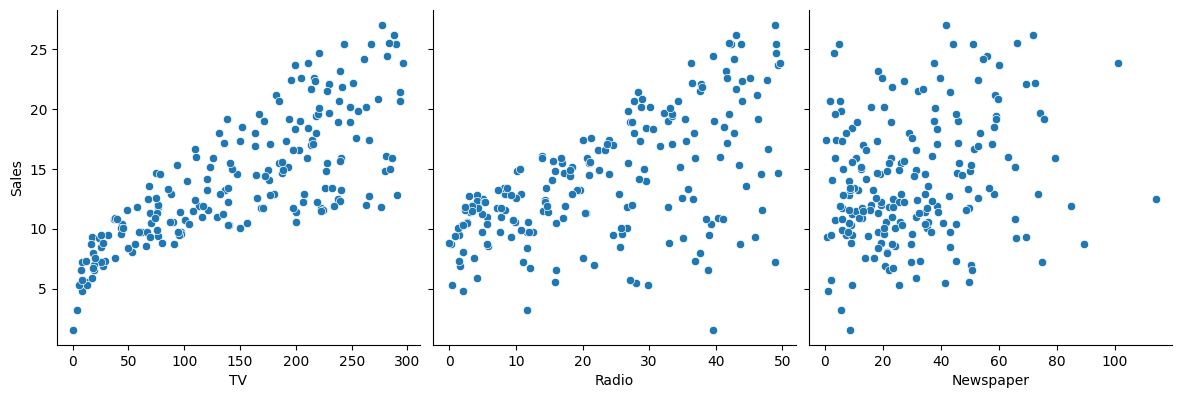

In [82]:
# Draw scatter plots to visualize the relationships between features and sales
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1)
plt.show()

In [83]:
# Calculate the correlation matrix
corr_matrix = data.corr()
corr_matrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


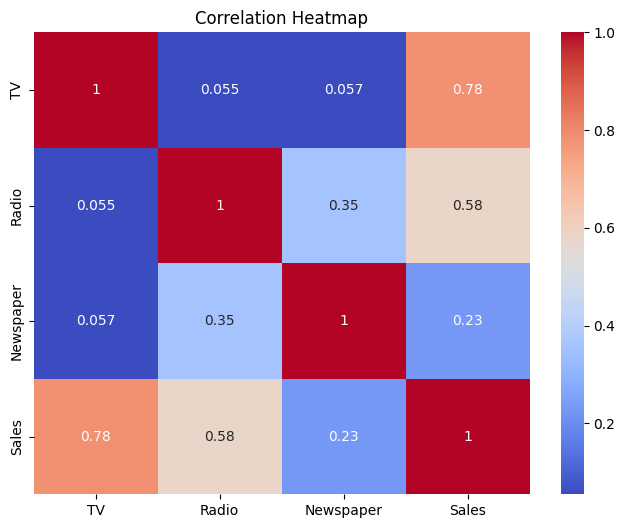

In [84]:
# Plot the heat map
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

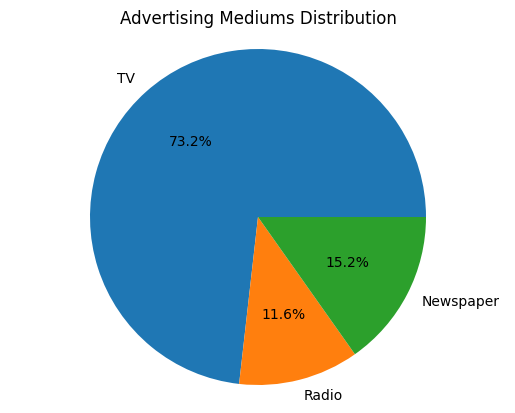

In [85]:
# Create a pie chart for the advertising mediums
mediums = ['TV', 'Radio', 'Newspaper']
mediums_total = data[mediums].sum()
plt.pie(mediums_total, labels=mediums, autopct='%1.1f%%')
plt.title('Advertising Mediums Distribution')
plt.axis('equal')
plt.show()

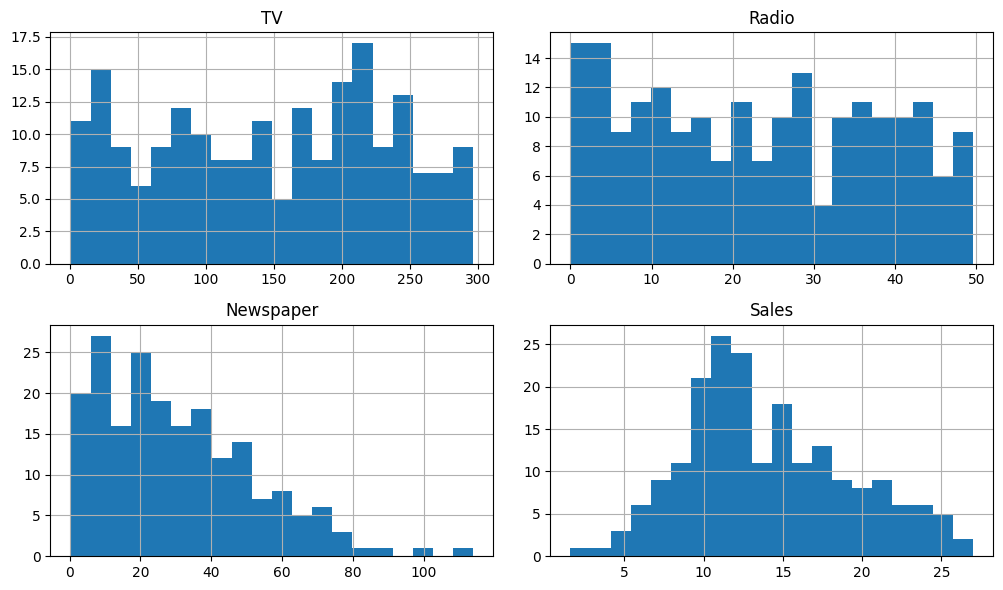

In [86]:
# Visualize the distributions of features and the target variable using histograms
data.hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

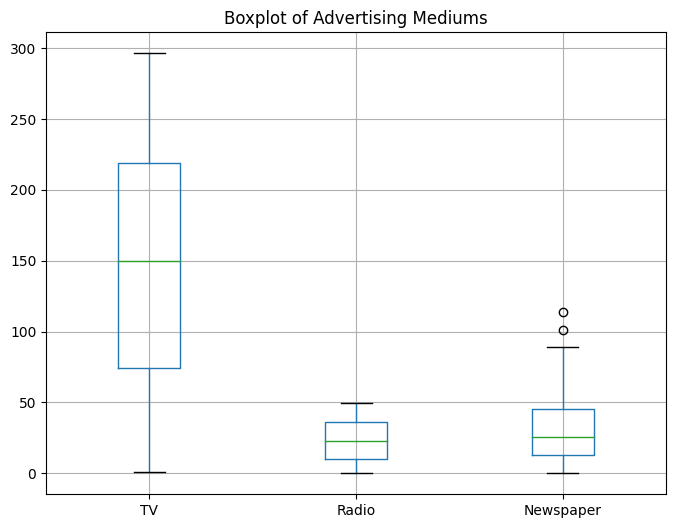

In [87]:
# Identify outliers using box plots
plt.figure(figsize=(8, 6))
data.boxplot(column=['TV', 'Radio', 'Newspaper'])
plt.title('Boxplot of Advertising Mediums')
plt.show()

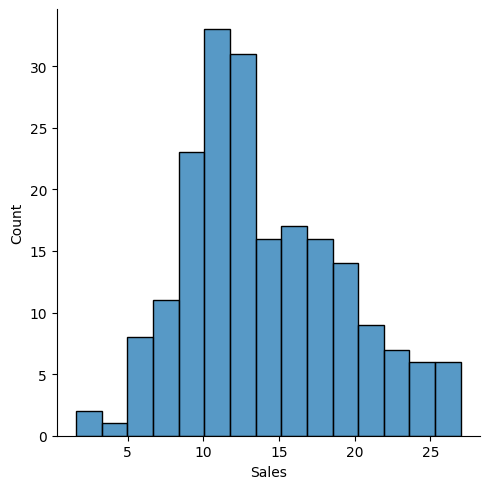

In [101]:
#Visualization of sales data
sns.displot(data['Sales'],bins=15)

In [88]:
# Handle outliers using winsorization
from scipy.stats.mstats import winsorize

data['TV'] = winsorize(data['TV'], limits=(0.05, 0.05))
data['Radio'] = winsorize(data['Radio'], limits=(0.05, 0.05))
data['Newspaper'] = winsorize(data['Newspaper'], limits=(0.05, 0.05))

Model Preparation

In [89]:
#Here Sales column is our target column
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [90]:
# Splitting the dataset into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Using Linear Regression to train the model

In [91]:
# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [92]:
coef = model.coef_
coef

array([0.04527244, 0.19211702, 0.00362735])

In [93]:
intercept = model.intercept_
intercept

2.8190116622058863

In [94]:
pred = model.predict(X_test)
compare= pd.DataFrame({"Actual_sales":list(y_test),"predicted_sales":list(pred)})
compare.head(10)

,Actual_sales,predicted_sales
0,16.9,16.474786
1,22.4,20.848210
2,21.4,21.120600
3,7.3,10.669682
4,24.7,21.796666
5,12.6,13.134229
6,22.3,21.166678
7,8.4,7.377934
8,11.5,13.588319
9,14.9,15.183111


Model Evaluation

In [95]:
# Predicting on the test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
ma = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Mean absolute error:", ma)

Mean Squared Error: 3.419586984032685
R-squared Score: 0.891660404353269
Mean absolute error: 1.502717973513161


In [102]:
# You can make predictions using the trained model on new data
new_data = pd.DataFrame({'TV': [100], 'Radio': [20], 'Newspaper': [10]})
predicted_sales1 = model.predict(new_data)

print("Predicted Sales:", predicted_sales1)

new_data = pd.DataFrame({'TV': [200], 'Radio': [44], 'Newspaper': [50]})
predicted_sales2 = model.predict(new_data)

print("Predicted Sales:", predicted_sales2)

new_data = pd.DataFrame({'TV': [140], 'Radio': [35], 'Newspaper': [25]})
predicted_sales3 = model.predict(new_data)

print("Predicted Sales:", predicted_sales3)

new_data = pd.DataFrame({'TV': [45], 'Radio': [70], 'Newspaper': [5]})
predicted_sales4 = model.predict(new_data)

print("Predicted Sales:", predicted_sales4)

new_data = pd.DataFrame({'TV': [75], 'Radio': [30], 'Newspaper': [12]})
predicted_sales5 = model.predict(new_data)

print("Predicted Sales:", predicted_sales5)

Predicted Sales: [11.22486986]
Predicted Sales: [20.50801664]
Predicted Sales: [15.97193314]
Predicted Sales: [18.32259989]
Predicted Sales: [12.02148372]
